<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GB885_Final_Project_Moreimi_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**RUSH Sportswear and Footwear**

**Background:**

You work as a sales analyst for RUSH, a globally renowned sportswear and footwear brand known for its innovative designs and performance-orientedproducts. The company stores its raw sales data as a collection of threetables:

  * TABLE_PRODUCTS
  * TABLE_RETAILER
  * TABLE_SALES

**Dataset(s) info:**

The data includes the number of units sold, the total sales revenue, the location of the sales, the type of product sold, as well as other relevant information. (For data field definitions and explanations, see the data dictionary.) The data is "raw," meaning it has not been cleaned and probably contains errors that need to be addressed.



**Business Case(s):**

The VP of US Sales has tasked you with analyzing sales data for trends and insights that will help company leadership understand the market and identify opportunities for growth. For example, you may want to look for trends or insights in seasonality, retailers, locations, or sales methods. Take initiative to apply your creativity and curiosity to this data.

In addition, she has asked you to answer the following business questions:

* What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?
* What state had the highest sales (in dollars) of women's products in 2021? How much was it?
* What state had the highest sales (in dollars) of men's products in 2021? How much was it?
* What retailer purchased the most units in 2021? In 2020?

**Table Schemas:**

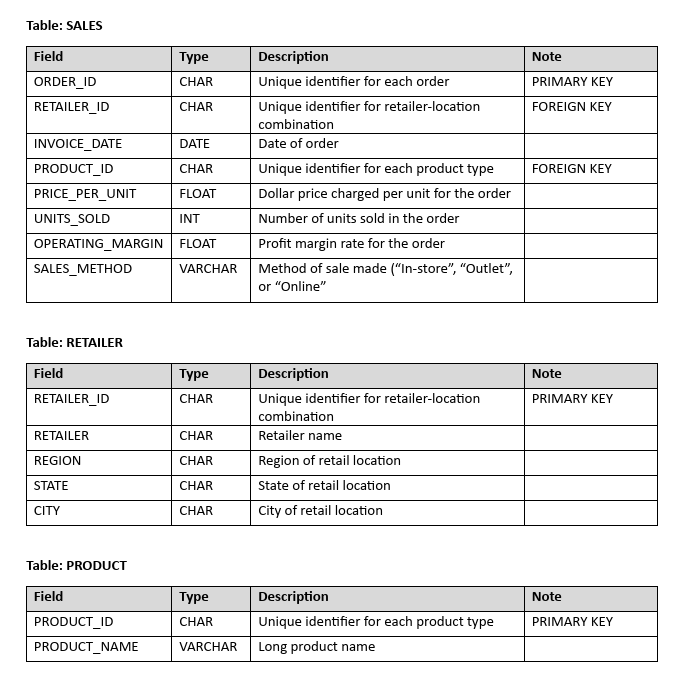

#### **Package Import and file upload**

In [1]:
### Import Needed Packages

# Data Analysis & Visualization
import pandas as pd
from pandas.api.types import is_integer_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime, date, time, timedelta

from itertools import product ### Used to find cross product result between 2 lists

# Statistical Analysis and Modeling
from scipy.stats import pointbiserialr

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm ### For purpose of viewing regression summary

# File import
from google.colab import files

In [2]:
#pandas setting
pd.set_option('display.max_columns', None) ### always show me all columns
pd.set_option('display.max_rows', None) ### always show all rows
pd.set_option('display.float_format', '{:.2f}'.format) ### Turn off scientific notation (format float)

In [3]:
### Upload RUSH Raw Sales Data Files
File_Upload = files.upload()

Saving TABLE_PRODUCTS_885.csv to TABLE_PRODUCTS_885 (2).csv
Saving TABLE_RETAILER_885.csv to TABLE_RETAILER_885 (2).csv
Saving TABLE_SALES_885.csv to TABLE_SALES_885 (2).csv


In [4]:
### Store Data in files to DF
# Products
# Data seems to be pipe delimited
Products_DF = pd.read_csv('TABLE_PRODUCTS_885.csv', delimiter = '|')

# Retailers
Retailer_DF = pd.read_csv('TABLE_RETAILER_885.csv')

# Sales
Sales_DF = pd.read_csv('TABLE_SALES_885.csv')

### **Exploratory Data Analysis:**

#### **Data Inspection:**

#####**View Data:**

**View Data Dimensions:**

In [5]:
### Prodcuts
Products_DF.shape

(6, 2)

In [6]:
### Retailer
Retailer_DF.shape

(110, 5)

In [7]:
### Sales
Sales_DF.shape

(9648, 11)

**View First Few Rows of Data:**

In [8]:
### Retailers
Retailer_DF.head()

,RETAILER_ID,RETAILER,REGION,STATE,CITY
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus
1,A00NMAPO,Amazon,Northeast,Maine,Portland
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington


In [9]:
### Products
Products_DF.head()

,PRODUCT_ID,PRODUCT_NAME
0,20,Men's Street Footwear
1,30,Men's Athletic Footwear
2,120,Women's Street Footwear
3,130,Women's Athletic Footwear
4,40,Men's Apparel


In [10]:
### Sales
Sales_DF.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.00,1200,0.50,In-store
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.00,1250,0.50,In-store
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.00,1220,0.50,Outlet
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.00,1200,0.50,Outlet
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.00,1220,0.50,Outlet


#####**View datatypes and potential data anomalies:**

In [11]:
### View Data Types of all 3 objects
Objects = [Sales_DF,Retailer_DF,Products_DF]

for Object in Objects:
  Object.info()
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          9648 non-null   int64  
 1   RETAILER_ID       9648 non-null   object 
 2   INVOICE_DATE      9648 non-null   object 
 3   MONTH             9648 non-null   int64  
 4   DAY               9648 non-null   int64  
 5   YEAR              9648 non-null   int64  
 6   PRODUCT_ID        9648 non-null   int64  
 7   PRICE_PER_UNIT    9646 non-null   float64
 8   UNITS_SOLD        9648 non-null   object 
 9   OPERATING_MARGIN  9648 non-null   float64
 10  SALES_METHOD      9648 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 829.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RETAILER_ID  110 non-null 

#####**Scan for null for nulls in columns and duped records:**

In [12]:
### Iterate through each object's columns to scan for nulls
for Object in Objects:
  print(Object.isnull().sum())
  print()

ORDER_ID            0
RETAILER_ID         0
INVOICE_DATE        0
MONTH               0
DAY                 0
YEAR                0
PRODUCT_ID          0
PRICE_PER_UNIT      2
UNITS_SOLD          0
OPERATING_MARGIN    0
SALES_METHOD        0
dtype: int64

RETAILER_ID    0
RETAILER       0
REGION         0
STATE          0
CITY           0
dtype: int64

PRODUCT_ID      0
PRODUCT_NAME    0
dtype: int64



In [13]:
### Iterate through each object to scan for dupes
for Object in Objects:
  print(Object[Object.duplicated()])
  print()

Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []

Empty DataFrame
Columns: [RETAILER_ID, RETAILER, REGION, STATE, CITY]
Index: []

Empty DataFrame
Columns: [PRODUCT_ID, PRODUCT_NAME]
Index: []



In [14]:
### Generate Descriptive Stats for each dataframe
for Object in Objects:
  print(Object.describe().T)
  print()

                   count    mean     std     min     25%     50%     75%  \
ORDER_ID         9648.00 4824.50 2785.28    1.00 2412.75 4824.50 7236.25   
MONTH            9648.00    6.46    3.45    1.00    3.00    6.00    9.00   
DAY              9648.00   14.70    7.35    1.00    9.00   15.00   21.00   
YEAR             9648.00 2020.87    0.34 2020.00 2021.00 2021.00 2021.00   
PRODUCT_ID       9648.00   79.98   50.67   20.00   30.00   40.00  130.00   
PRICE_PER_UNIT   9646.00   55.58 1017.82    7.00   35.00   45.00   55.00   
OPERATING_MARGIN 9648.00    0.42    0.10    0.10    0.35    0.41    0.49   

                      max  
ORDER_ID          9648.00  
MONTH               12.00  
DAY                 31.00  
YEAR              2021.00  
PRODUCT_ID         140.00  
PRICE_PER_UNIT   99999.00  
OPERATING_MARGIN     0.80  

            count unique          top freq
RETAILER_ID   110    106     W00SFLOR    2
RETAILER      110      6  Foot Locker   33
REGION        110      5    Northeast

#####**View frequency of object variables in DFs:**

In [15]:
### Sales
obj_vars_Sales = list(Sales_DF.select_dtypes(include = ['object']).columns)

for columns in obj_vars_Sales:
  print(columns)
  print(Sales_DF[columns].value_counts())


RETAILER_ID
RETAILER_ID
W00SARLI     216
W00WUTSA     216
W00WORPO     216
W00WNELA     216
S00STEDA     204
S00SALBI     204
K00WCALO     204
W00WCASA     204
A00NVEBU     204
F00NPEPH     204
S00STEKN     204
W00SFLOR     189
W00SLONE     180
F00WARPH     177
K00WNEAL     177
S00SGEAT     177
F00SVIRI     177
W00STEHO     162
S00NCOHA     150
S00NMABO     150
F00NRHPR     150
W00SOKOK     150
W00WCODE     144
W00MININ     144
W00MWIMI     143
F00NNENE     138
K00MMOBI     136
F00MNEOM     136
F00MILCH     136
W00WWASE     136
F00MMIMI     136
A00NMAPO     136
A00MOHCO     136
A00NNEMA     135
A00WALAN     126
K00WWYCH     118
W00NNEAL     118
F00SSOCH     118
F00MMIST     118
S00SNOCH     118
S00MMIDE     118
A00SKELO     108
W00NWECH     106
F00NDEWI     100
F00MIODE     100
F00MSOSI     100
S00MNOFA     100
K00MKAWI     100
K00NNENE     100
F00SMIJA      84
F00WIDBO      81
F00NNEMA      81
W00WIDBO      75
F00WHAHO      74
W00SMIJA      66
K00SOKOK      66
S00SMIJA      66
W00NNEN

In [16]:
### Retailer
obj_vars_Retailer = list(Retailer_DF.select_dtypes(include = ['object']).columns)

for columns in obj_vars_Retailer:
  print(columns)
  print(Retailer_DF[columns].value_counts())

RETAILER_ID
RETAILER_ID
W00SFLOR    2
S00NNENE    2
W00SARLI    2
W00STEHO    2
A00NVEBU    1
A00SALBI    1
A00NMABO    1
A00NNEMA    1
A00MOHCO    1
A00NMAPO    1
F00MIODE    1
F00MKAWI    1
F00MMIDE    1
F00MMIMI    1
F00MMIST    1
F00MNEOM    1
F00MNOFA    1
F00MSOSI    1
F00NCOHA    1
F00NDEWI    1
F00NMABA    1
F00NNEMA    1
F00NNENE    1
F00NPEPH    1
F00NRHPR    1
F00NWECH    1
F00SLONE    1
F00SMIJA    1
F00STEKN    1
F00STEDA    1
F00SFLMI    1
F00SGEAT    1
F00SKELO    1
F00SSOCH    1
F00SVIRI    1
F00WALAN    1
F00WARPH    1
F00WCALO    1
A00SKELO    1
A00SNOCH    1
A00WALAN    1
F00MILCH    1
F00WWYCH    1
F00WWASE    1
F00WIDBO    1
F00WHAHO    1
K00NNENE    1
K00MKAWI    1
K00MMOBI    1
K00MMIMI    1
K00WCALO    1
K00WCASA    1
K00WNEAL    1
K00WWYCH    1
S00MILCH    1
K00NNEAL    1
K00SOKOK    1
K00NDEWI    1
S00MNEOM    1
S00MNOFA    1
S00NCOHA    1
S00MSOSI    1
S00NMABA    1
S00NMABO    1
S00NRHPR    1
S00SALBI    1
S00SMIJA    1
S00STEKN    1
S00STEDA    1
S00STEHO  

In [17]:
### Product
obj_vars_Product = list(Products_DF.select_dtypes(include = ['object']).columns)

for columns in obj_vars_Product:
  print(columns)
  print(Products_DF[columns].value_counts())

PRODUCT_NAME
PRODUCT_NAME
Men's Street Footwear        1
Men's Athletic Footwear      1
Women's Street Footwear      1
Women's Athletic Footwear    1
Men's Apparel                1
Women's Apparel              1
Name: count, dtype: int64


##### **View Distinct Values in DFs**

In [18]:
### Sales DF
for columns in obj_vars_Sales:
  print(columns)
  print(Sales_DF[columns].unique())

RETAILER_ID
['A00MOHCO' 'A00NMAPO' 'A00NMABO' 'A00NNEMA' 'A00NVEBU' 'A00SALBI'
 'A00SKELO' 'A00SNOCH' 'A00WALAN' 'F00SLONE' 'F00SGEAT' 'F00SVIRI'
 'F00WALAN' 'F00WARPH' 'F00WHAHO' 'F00MNEOM' 'F00WIDBO' 'F00WWYCH'
 'F00MILCH' 'F00MIODE' 'F00MKAWI' 'F00MMIDE' 'F00MMIMI' 'F00MMIST'
 'F00MNOFA' 'F00MSOSI' 'F00NCOHA' 'F00NDEWI' 'F00NMABA' 'F00NNEMA'
 'F00SFLMI' 'F00NNENE' 'F00NPEPH' 'F00SKELO' 'F00NRHPR' 'F00SSOCH'
 'F00NWECH' 'F00SMIJA' 'F00STEKN' 'F00STEDA' 'F00WCALO' 'F00WWASE'
 'K00WARPH' 'K00WNEAL' 'K00NDEWI' 'K00NNENE' 'K00NNEAL' 'K00WWYCH'
 'K00MMIMI' 'K00MMOBI' 'K00WCALO' 'K00WCASA' 'K00MKAWI' 'K00SOKOK'
 'S00MILCH' 'S00SFLOR' 'S00SGEAT' 'S00MMOBI' 'S00SVIRI' 'S00MNEOM'
 'S00WHAHO' 'S00WNEAL' 'S00MMIDE' 'S00MNOFA' 'S00MSOSI' 'S00NCOHA'
 'S00NMABA' 'S00NNENE' 'S00NMABO' 'S00NRHPR' 'S00SMIJA' 'S00SFLMI'
 'S00SNOCH' 'S00SSOCH' 'S00SALBI' 'S00STEKN' 'S00STEDA' 'S00STEHO'
 'S00WIDBO' 'W00SFLOR' 'W00WHAHO' 'W00NNENE' 'W00SMIJA' 'W00SARLI'
 'W00STEHO' 'W00NMAPO' 'W00NPEPH' 'W00SLONE' 'W00W

In [19]:
### Retailer DF
for columns in obj_vars_Retailer:
  print(columns)
  print(Retailer_DF[columns].unique())

RETAILER_ID
['A00MOHCO' 'A00NMAPO' 'A00NMABO' 'A00NNEMA' 'A00NVEBU' 'A00SALBI'
 'A00SKELO' 'A00SNOCH' 'A00WALAN' 'F00MILCH' 'F00MIODE' 'F00MKAWI'
 'F00MMIDE' 'F00MMIMI' 'F00MMIST' 'F00MNEOM' 'F00MNOFA' 'F00MSOSI'
 'F00NCOHA' 'F00NDEWI' 'F00NMABA' 'F00NNEMA' 'F00NNENE' 'F00NPEPH'
 'F00NRHPR' 'F00NWECH' 'F00SLONE' 'F00SMIJA' 'F00STEKN' 'F00STEDA'
 'F00SFLMI' 'F00SGEAT' 'F00SKELO' 'F00SSOCH' 'F00SVIRI' 'F00WALAN'
 'F00WARPH' 'F00WCALO' 'F00WHAHO' 'F00WIDBO' 'F00WWASE' 'F00WWYCH'
 'K00MKAWI' 'K00MMIMI' 'K00MMOBI' 'K00NDEWI' 'K00NNENE' 'K00NNEAL'
 'K00SOKOK' 'K00WARPH' 'K00WCALO' 'K00WCASA' 'K00WNEAL' 'K00WWYCH'
 'S00MILCH' 'S00MMIDE' 'S00MMOBI' 'S00MNEOM' 'S00MNOFA' 'S00MSOSI'
 'S00NCOHA' 'S00NMABA' 'S00NMABO' 'S00NNENE' 'S00NRHPR' 'S00SALBI'
 'S00SMIJA' 'S00STEKN' 'S00STEDA' 'S00STEHO' 'S00SFLMI' 'S00SFLOR'
 'S00SGEAT' 'S00SNOCH' 'S00SSOCH' 'S00SVIRI' 'S00WHAHO' 'S00WIDBO'
 'S00WNEAL' 'W00NNENE' 'W00SARLI' 'W00SMIJA' 'W00STEHO' 'W00SFLOR'
 'W00WHAHO' 'W00MININ' 'W00MIODE' 'W00MMIST' 'W00M

In [20]:
### Product DF
for columns in obj_vars_Product:
  print(columns)
  print(Products_DF[columns].unique())

PRODUCT_NAME
["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


##### **Scan For Outliers:**

In [21]:
### IQR Method

# Define Function to calculate the IQR
def count_iqr_outliers(df,column):
  # define q1
  q1 = df[column].quantile(0.25)
  # define q3
  q3 = df[column].quantile(0.75)
  # define iqr
  iqr = q3 - q1
  # define outlier thresholds
  l_threshold = q1 - 1.5 * iqr
  u_threshold = q3 + 1.5 * iqr
  # count outliers
  outliers = (df[column] < l_threshold) | (df[column] > u_threshold)
  # Count the number of True values (outliers)
  return outliers.sum()

In [22]:
#### Apply IQR Function to Sales DF

### List out all continous variables
Sales_num_vars = list(Sales_DF.select_dtypes(include = ['int','float64']).columns)

# Create Dct to store fields and outlier frequency
outlier_dct = {}

# Iterate through all fields in the num_var list, use to count outlier frequecy
for field in Sales_num_vars:
  outlier_dct[field] = count_iqr_outliers(Sales_DF,field)

# Sort by total outliers in descending order
sorted_outlier_fields = pd.Series(outlier_dct).sort_values(ascending = False)

# Show Result
sorted_outlier_fields

,0
YEAR,1302
PRICE_PER_UNIT,82
OPERATING_MARGIN,44
DAY,0
MONTH,0
ORDER_ID,0
PRODUCT_ID,0


#####**Inital Observations:**

* The Sales_DF is a fact table that contains foreign keys: Retailer_ID and Product_ID. These fields should allow for merging with the retailer df and products df.

* **(DONE)** Sales Method Field in the Sales_DF has an "Ootlet" field that should be part of the "Outlet" bucket. Will fix his error.

* **(DONE)** Sales_DF has a retailer_ID value of 999999999, which is a clear outlier record. There is only one record present. Will Drop this row for purpose of analysis.

* **(DONE)** Units_Sold in the sales table is an OBJECT datatype. May need to convert this to an integer for later analysis.

* **(DONE)** Units_Sold field has an (***) Entry. This needs to be handled pre-conversion to int.

* **(DONE)** The Price_Per_Unit Field in the Sales Table has 2 null records.

* There are no duped rows in any of the dataframes

* **(DONE)** Price Per Unit field in Sales table has a max value of 99999.... outlier may need to be removed.

* **(DONE)** In the Retailer DF, the below retailer IDs appear more than once (may need to investigate further later on):

   * W00SFLOR    2 (Either 1 ID tied to 2 companies, or to 2 different states)

   * S00NNENE    2 (Either 1 ID tied to 2 companies, or to 2 different states)
    
   * W00SARLI    2 (Either 1 ID tied to 2 companies, or to 2 different states)

   * W00STEHO    2 (Either 1 ID tied to 2 companies, or to 2 different states)

* From an outlier perspective, the sales df was scrubbed:

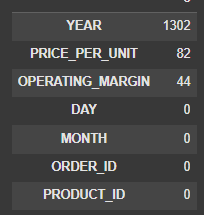

The Price per unit and operating margin fields should be looked at

  * Price Per Unit field needs to be looked at
  * Operating margin field looks fine

**NOTE:**

Data consolidation will be performed after cleansing is completed for the sake of ensure no row duplication will be present post merge.
  

#### **Data Cleansing:**

##### **Treating Units_Sold Field:**

In [23]:
### Look for all *** Instances in Sales DF
for columns in Sales_DF:
  print(Sales_DF[Sales_DF[columns] == '***'])

Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Column

In [24]:
### handle erroneous value in units sold field in SalesDF (***)

# View Fields with *** entries
Sales_DF[Sales_DF['UNITS_SOLD'] == '***']

# View Value counts in this field, in descending order
Sales_DF['UNITS_SOLD'].value_counts().sort_values(ascending = False)

# View Mode of this field
Units_Sold_Mode = Sales_DF['UNITS_SOLD'].mode()[0]

# Replace erroneous values with mode
Sales_DF.replace(to_replace = '***', value= Units_Sold_Mode, inplace = True)

In [25]:
### Run again to see if *** records were eliminated
for columns in Sales_DF:
  print(Sales_DF[Sales_DF[columns] == '***'])

Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD]
Index: []
Empty DataFrame
Column

In [26]:
### Convert Units Sold Field to int
Sales_DF['UNITS_SOLD'] = pd.to_numeric(Sales_DF['UNITS_SOLD'], errors= 'coerce').astype('int64')

In [27]:
### Check if Units Sold field was converted correctly
Sales_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          9648 non-null   int64  
 1   RETAILER_ID       9648 non-null   object 
 2   INVOICE_DATE      9648 non-null   object 
 3   MONTH             9648 non-null   int64  
 4   DAY               9648 non-null   int64  
 5   YEAR              9648 non-null   int64  
 6   PRODUCT_ID        9648 non-null   int64  
 7   PRICE_PER_UNIT    9646 non-null   float64
 8   UNITS_SOLD        9648 non-null   int64  
 9   OPERATING_MARGIN  9648 non-null   float64
 10  SALES_METHOD      9648 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 829.3+ KB


In [28]:
### Check Stats on Units Solad Field
Sales_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDER_ID,9648.00,4824.50,2785.28,1.00,2412.75,4824.50,7236.25,9648.00
MONTH,9648.00,6.46,3.45,1.00,3.00,6.00,9.00,12.00
DAY,9648.00,14.70,7.35,1.00,9.00,15.00,21.00,31.00
YEAR,9648.00,2020.87,0.34,2020.00,2021.00,2021.00,2021.00,2021.00
PRODUCT_ID,9648.00,79.98,50.67,20.00,30.00,40.00,130.00,140.00
PRICE_PER_UNIT,9646.00,55.58,1017.82,7.00,35.00,45.00,55.00,99999.00
UNITS_SOLD,9648.00,256.94,214.25,0.00,106.00,176.00,350.00,1275.00
OPERATING_MARGIN,9648.00,0.42,0.10,0.10,0.35,0.41,0.49,0.80


#####**Treating Nulls and Outliers in Price Per Unit Field:**

In [29]:
### View Null Records for Price_Per_Unit FIeld
[Sales_DF['PRICE_PER_UNIT'].isna()]

[0       False
 1       False
 2       False
 3       False
 4       False
 5       False
 6       False
 7       False
 8       False
 9       False
 10      False
 11      False
 12      False
 13      False
 14      False
 15      False
 16      False
 17      False
 18      False
 19      False
 20      False
 21      False
 22      False
 23      False
 24      False
 25      False
 26      False
 27      False
 28      False
 29      False
 30      False
 31      False
 32      False
 33      False
 34      False
 35      False
 36      False
 37      False
 38      False
 39      False
 40      False
 41      False
 42      False
 43      False
 44      False
 45      False
 46      False
 47      False
 48      False
 49      False
 50      False
 51      False
 52      False
 53      False
 54      False
 55      False
 56      False
 57      False
 58      False
 59      False
 60      False
 61      False
 62      False
 63      False
 64      False
 65      False
 66      F

In [30]:
### View Distribution of Values in PPU Field
Sales_DF['PRICE_PER_UNIT'].describe()

,PRICE_PER_UNIT
count,9646.00
mean,55.58
std,1017.82
min,7.00
25%,35.00
50%,45.00
75%,55.00
max,99999.00


In [31]:
### View Outliers in Price_Per_Unit Field
Price_Per_Unit_Dist = Sales_DF['PRICE_PER_UNIT'].value_counts()

Price_Per_Unit_Dist.sort_values(ascending = True)

,count
PRICE_PER_UNIT,
8.00,1
98.00,1
101.00,1
99999.00,1
103.00,2
97.00,2
88.00,2
92.00,2
84.00,2


**Note:**

One record of 99999 in price_per_unit field. Other Outliers caught by IQRmethod seem reasonable, will impute this value with mean of dataset, sans the outlier value.

In [32]:
### Find Mean of ppu field without outlier

# Create a new df sans outlier
Sales_DF_No_Outlier = Sales_DF[Sales_DF['PRICE_PER_UNIT'] != 99999]

# Find mean of ppu field
Avg_PPU = round(Sales_DF_No_Outlier['PRICE_PER_UNIT'].mean(),2)

# Replace outlier in original df with mean
Sales_DF.replace(to_replace = 99999, value = Avg_PPU, inplace = True)

In [33]:
### Check stats on field now:
Sales_DF['PRICE_PER_UNIT'].describe()

,PRICE_PER_UNIT
count,9646.00
mean,45.21
std,14.71
min,7.00
25%,35.00
50%,45.00
75%,55.00
max,110.00


In [34]:
# View Nulls
Sales_DF[Sales_DF['PRICE_PER_UNIT'].isna()]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
98,591,A00NVEBU,4/2/2020,4,2,2020,20,NaN,525,0.35,In-store
99,597,A00NVEBU,4/8/2020,4,8,2020,20,NaN,525,0.50,In-store


In [35]:
### Inpute nulls with mean in PPU Field
Sales_DF['PRICE_PER_UNIT'].fillna(Avg_PPU, inplace = True)

/tmp/ipython-input-847989300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sales_DF['PRICE_PER_UNIT'].fillna(Avg_PPU, inplace = True)


##### **Handle Erroneous Field in the Sales_Method field in Sales_DF:**

In [36]:
### Fix the "Ootlet" records (20 Records)
Sales_DF.groupby('SALES_METHOD')['SALES_METHOD'].count()

,SALES_METHOD
SALES_METHOD,
In-store,1740
Online,4889
Ootlet,20
Outlet,2999


In [37]:
### Correct "Ootlet" to "Outlet"
Sales_DF['SALES_METHOD'].replace(to_replace = 'Ootlet', value = 'Outlet', inplace = True)

/tmp/ipython-input-1133383437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sales_DF['SALES_METHOD'].replace(to_replace = 'Ootlet', value = 'Outlet', inplace = True)


In [38]:
### Check to see if correction was made as intended to field
Sales_DF.groupby('SALES_METHOD')['SALES_METHOD'].count()

,SALES_METHOD
SALES_METHOD,
In-store,1740
Online,4889
Outlet,3019


##### **Handle Erroneous Field in RETAILER_ID field in Sales_DF:**

In [39]:
#### View retailer_id in question
Sales_DF[Sales_DF['RETAILER_ID'] == '999999999']

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
1446,8668,999999999,7/23/2021,7,23,2021,20,60.00,298,0.42,Outlet


In [40]:
#### Drop Row
Sales_DF.drop(index = 1446, axis = 0, inplace = True)

In [41]:
#### Check to see if row is gone
Sales_DF[Sales_DF['RETAILER_ID'] == '999999999']

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD


#####**Handle Duplicate Retailer IDs in Retailer DF:**

In [42]:
### View Retailer IDS in question
Retailer_DF[Retailer_DF['RETAILER_ID'].duplicated()]

,RETAILER_ID,RETAILER,REGION,STATE,CITY
64,S00NNENE,Sports Direct,Northeast,New York,New York
97,W00SARLI,West Gear,South,Arkansas,Little Rock
100,W00STEHO,West Gear,South,Texas,Houston
102,W00SFLOR,West Gear,Southeast,Florida,Orlando


In [43]:
### Put Duped IDs into lists
Duped_Ids = ['S00NNENE','W00SARLI','W00STEHO','W00SFLOR']

### Filter to specific rows containing these IDs
Retailer_DF[Retailer_DF['RETAILER_ID'].isin(Duped_Ids)].sort_values(by = 'RETAILER_ID', ascending = True)

,RETAILER_ID,RETAILER,REGION,STATE,CITY
63,S00NNENE,Sports Direct,Northeast,New Jersey,Newark
64,S00NNENE,Sports Direct,Northeast,New York,New York
81,W00SARLI,Walmart,South,Arkansas,Little Rock
97,W00SARLI,West Gear,South,Arkansas,Little Rock
84,W00SFLOR,Walmart,Southeast,Florida,Orlando
102,W00SFLOR,West Gear,Southeast,Florida,Orlando
83,W00STEHO,Walmart,South,Texas,Houston
100,W00STEHO,West Gear,South,Texas,Houston


**NOTE:**

Need to correct the Retailer_ID situation here before merging with Sales DF to avoid duplicaton.

After reviewing the RETAILER Table, I will probably choose only one of the 2 Retailer ID Rows to keep in the Retailer table in order to avoid the duplication issue.

In [44]:
#### Create a Rank Field on the Retailer Dataframe based on RetailerID

### Create Helper fields for deduping
# Create a unique key to partition the data by
Retailer_DF['Partition_Level'] = Retailer_DF['RETAILER'] + Retailer_DF['STATE']

# Create Rank Field
Retailer_DF['ID_Rnk'] = Retailer_DF.groupby('RETAILER_ID')['Partition_Level'].rank(method = 'dense', ascending = True)

### Dedup DF
# Dedup Retialer DF by Rank
Retailer_DF = Retailer_DF[Retailer_DF['ID_Rnk'] == 1]

# View Data Frame
Retailer_DF

,RETAILER_ID,RETAILER,REGION,STATE,CITY,Partition_Level,ID_Rnk
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus,AmazonOhio,1.00
1,A00NMAPO,Amazon,Northeast,Maine,Portland,AmazonMaine,1.00
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston,AmazonMassachusetts,1.00
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester,AmazonNew Hampshire,1.00
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington,AmazonVermont,1.00
5,A00SALBI,Amazon,South,Alabama,Birmingham,AmazonAlabama,1.00
6,A00SKELO,Amazon,Southeast,Kentucky,Louisville,AmazonKentucky,1.00
7,A00SNOCH,Amazon,Southeast,North Carolina,Charlotte,AmazonNorth Carolina,1.00
8,A00WALAN,Amazon,West,Alaska,Anchorage,AmazonAlaska,1.00
9,F00MILCH,Foot Locker,Midwest,Illinois,Chicago,Foot LockerIllinois,1.00


In [45]:
# Check to see if RetailerIDs are unique for the df
Retailer_DF[Retailer_DF['RETAILER_ID'].duplicated()]

,RETAILER_ID,RETAILER,REGION,STATE,CITY,Partition_Level,ID_Rnk


In [46]:
# Remove Partition level and rank helper fields
Retailer_DF.drop(Retailer_DF[['Partition_Level','ID_Rnk']], axis = 1, inplace = True)

/tmp/ipython-input-618277032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retailer_DF.drop(Retailer_DF[['Partition_Level','ID_Rnk']], axis = 1, inplace = True)


In [47]:
# View Cleaned DF
Retailer_DF.head()

,RETAILER_ID,RETAILER,REGION,STATE,CITY
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus
1,A00NMAPO,Amazon,Northeast,Maine,Portland
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington


**Final Note:**

Cleansing Complete. Data ready for merge and analysis

##### **Data Consolidation:**

In [48]:
# Merge Sales df to Retailer df first
Rush_Consolidated_DF = pd.merge(Sales_DF,Retailer_DF, on = 'RETAILER_ID', how = 'left')

# Merge new consolidated df with Product DF
Rush_Consolidated_DF_Clean = pd.merge(Rush_Consolidated_DF,Products_DF, on = 'PRODUCT_ID', how = 'left')

# View New DF
Rush_Consolidated_DF_Clean.head()


,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


#### **Prep Combined DF for Analysis:**

In [49]:
### Removed Unneeded Fields
Rush_Consolidated_DF_Clean.drop(Rush_Consolidated_DF_Clean[['RETAILER_ID','MONTH','DAY','PRODUCT_ID']], axis = 1, inplace = True)

In [50]:
### View DF Info
Rush_Consolidated_DF_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          9647 non-null   int64  
 1   INVOICE_DATE      9647 non-null   object 
 2   YEAR              9647 non-null   int64  
 3   PRICE_PER_UNIT    9647 non-null   float64
 4   UNITS_SOLD        9647 non-null   int64  
 5   OPERATING_MARGIN  9647 non-null   float64
 6   SALES_METHOD      9647 non-null   object 
 7   RETAILER          9647 non-null   object 
 8   REGION            9647 non-null   object 
 9   STATE             9647 non-null   object 
 10  CITY              9647 non-null   object 
 11  PRODUCT_NAME      9647 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 904.5+ KB


In [51]:
### Convert INVOICE_DATE Field to Date
Rush_Consolidated_DF_Clean['INVOICE_DATE'] = pd.to_datetime(Rush_Consolidated_DF_Clean['INVOICE_DATE'])

In [52]:
### View Combined DF
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,2020-01-01,2020,50.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,2020-01-07,2020,50.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,2020-01-25,2020,50.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,2020-01-31,2020,50.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,2020-02-06,2020,60.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


##### **Feature Engineering:**

######**Continous Features:**

In [53]:
### Create A Sales Revenue Field
Rush_Consolidated_DF_Clean['TOTAL_SALES_REVENUE'] = Rush_Consolidated_DF_Clean['PRICE_PER_UNIT'] * Rush_Consolidated_DF_Clean['UNITS_SOLD']

### Create a total cost field
Rush_Consolidated_DF_Clean['TOTAL_COSTS'] = Rush_Consolidated_DF_Clean['TOTAL_SALES_REVENUE'] * (1 - Rush_Consolidated_DF_Clean['OPERATING_MARGIN'])

### Create a Net Revenue Field
Rush_Consolidated_DF_Clean['NET_REVENUE'] = Rush_Consolidated_DF_Clean['TOTAL_SALES_REVENUE'] - Rush_Consolidated_DF_Clean['TOTAL_COSTS']

### Create a Net Revenue Per Unit Field
Rush_Consolidated_DF_Clean['NET_REVENUE_PER_UNIT'] = Rush_Consolidated_DF_Clean['NET_REVENUE'] / Rush_Consolidated_DF_Clean['UNITS_SOLD']

In [54]:
### View DF
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT
0,1,2020-01-01,2020,50.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,60000.00,30000.00,30000.00,25.00
1,7,2020-01-07,2020,50.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,62500.00,31250.00,31250.00,25.00
2,13,2020-01-25,2020,50.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,61000.00,30500.00,30500.00,25.00
3,19,2020-01-31,2020,50.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,60000.00,30000.00,30000.00,25.00
4,25,2020-02-06,2020,60.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,73200.00,36600.00,36600.00,30.00


In [55]:
### Create Function For Moving Columns Around

def Column_Mover(col_lst,df):
  ''' This functions acts
  as a helper to move
  columns around in a DF
  to specified location.
  '''
  cols_to_move = []

  ### Loop through each item in the list, plug in values to pop and insert statements to move fields
  for field,pos in col_lst:
    pop_fields = df.pop(field)
    df.insert(pos,field,pop_fields)


In [56]:
### Move fields to appropriate spots

### List all fields that need to be moved in tuples of field name/new position
cols_to_move = [
    ('TOTAL_SALES_REVENUE',4),
    ('TOTAL_COSTS',5),
    ('NET_REVENUE',6),
    ('NET_REVENUE_PER_UNIT',7)
]

### Column mover function to move specified columns to desired location
Column_Mover(cols_to_move,Rush_Consolidated_DF_Clean)


# View DF (This Dataframe is good for reporting purposes)
Rush_Consolidated_DF_Clean.head()


,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME
0,1,2020-01-01,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
1,7,2020-01-07,2020,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
2,13,2020-01-25,2020,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
3,19,2020-01-31,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear
4,25,2020-02-06,2020,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear


In [57]:
### Add a truncated Invoice date field to monthly level
Rush_Consolidated_DF_Clean['INVOICE_MONTH'] = Rush_Consolidated_DF_Clean['INVOICE_DATE'].dt.to_period('M').dt.to_timestamp()

# .dt.to_period('M'): converts the date to a monthly period (e.g., 2025-01).
# .dt.to_timestamp(): converts that period back to a timestamp, defaulting to the first day of the month at midnight.

# View Data
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,INVOICE_MONTH
0,1,2020-01-01,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01
1,7,2020-01-07,2020,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01
2,13,2020-01-25,2020,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01
3,19,2020-01-31,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01
4,25,2020-02-06,2020,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-02-01


In [58]:
### Create Copy of DF for statistical analysis
Rush_Consolidated_DF_Modeling = Rush_Consolidated_DF_Clean.copy()

###### **Categorical Features:**

In [59]:
### View Unique Fields in SALES_METHOD and REGION Fields

Dummy_Fields = ['SALES_METHOD','REGION']

for fields in Dummy_Fields:
  print(fields)
  print(Rush_Consolidated_DF_Modeling[fields].unique())


SALES_METHOD
['In-store' 'Outlet' 'Online']
REGION
['Midwest' 'Northeast' 'South' 'Southeast' 'West']


In [60]:
### Create Dummy Variables from SALES_METHOD Entries
Rush_Consolidated_DF_Modeling = pd.get_dummies(
    data = Rush_Consolidated_DF_Modeling,
    columns = Dummy_Fields,
    dtype = int
)

In [61]:
### View Modeling Dataset
Rush_Consolidated_DF_Modeling.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,RETAILER,STATE,CITY,PRODUCT_NAME,INVOICE_MONTH,SALES_METHOD_In-store,SALES_METHOD_Online,SALES_METHOD_Outlet,REGION_Midwest,REGION_Northeast,REGION_South,REGION_Southeast,REGION_West
0,1,2020-01-01,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,1,0,0,1,0,0,0,0
1,7,2020-01-07,2020,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,1,0,0,1,0,0,0,0
2,13,2020-01-25,2020,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,0,0,1,1,0,0,0,0
3,19,2020-01-31,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,0,0,1,1,0,0,0,0
4,25,2020-02-06,2020,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-02-01,0,0,1,1,0,0,0,0


**Split product name variable into 2 categorical features:**



In [62]:
### Check fields in this column
Rush_Consolidated_DF_Modeling['PRODUCT_NAME'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Men's Apparel", "Women's Street Footwear",
       "Women's Athletic Footwear", "Women's Apparel"], dtype=object)

**Create fields in Modeling DF:**

In [63]:
### Create a product type field
Rush_Consolidated_DF_Modeling['PRODUCT_TYPE'] = (
    Rush_Consolidated_DF_Modeling['PRODUCT_NAME']
    .str.replace(r"^(Men's|Women's)\s+", '', regex=True)  ### ^ ensures match from start of string, checks for either Men's or Women's, \s+ removes space after
)

In [64]:
### Create a product department field
Rush_Consolidated_DF_Modeling['PRODUCT_DEPT'] = (
    Rush_Consolidated_DF_Modeling['PRODUCT_NAME'].str.extract(r"^(Men|Women)")   ### Extracts either Men or Women from start of string
)

**Create Same Fields in Reporting DF:**

In [65]:
### Create a product type bucket
Rush_Consolidated_DF_Clean['PRODUCT_TYPE'] = (
    Rush_Consolidated_DF_Clean['PRODUCT_NAME']
    .str.replace(r"^(Men's|Women's)\s+", '', regex=True)  ### ^ ensures match from start of string, checks for either Men's or Women's, \s+ removes space after
)

In [66]:
### Create a product department
Rush_Consolidated_DF_Clean['PRODUCT_DEPT'] = (
    Rush_Consolidated_DF_Clean['PRODUCT_NAME'].str.extract(r"^(Men|Women)")   ### Extracts either Men or Women from start of string
)

In [67]:
### View Reporting DF
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,INVOICE_MONTH,PRODUCT_TYPE,PRODUCT_DEPT
0,1,2020-01-01,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01,Street Footwear,Men
1,7,2020-01-07,2020,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01,Street Footwear,Men
2,13,2020-01-25,2020,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01,Street Footwear,Men
3,19,2020-01-31,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-01-01,Street Footwear,Men
4,25,2020-02-06,2020,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,2020-02-01,Street Footwear,Men


In [68]:
### View Modeling DF
Rush_Consolidated_DF_Modeling.head()

,ORDER_ID,INVOICE_DATE,YEAR,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,RETAILER,STATE,CITY,PRODUCT_NAME,INVOICE_MONTH,SALES_METHOD_In-store,SALES_METHOD_Online,SALES_METHOD_Outlet,REGION_Midwest,REGION_Northeast,REGION_South,REGION_Southeast,REGION_West,PRODUCT_TYPE,PRODUCT_DEPT
0,1,2020-01-01,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,1,0,0,1,0,0,0,0,Street Footwear,Men
1,7,2020-01-07,2020,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,1,0,0,1,0,0,0,0,Street Footwear,Men
2,13,2020-01-25,2020,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,0,0,1,1,0,0,0,0,Street Footwear,Men
3,19,2020-01-31,2020,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-01-01,0,0,1,1,0,0,0,0,Street Footwear,Men
4,25,2020-02-06,2020,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,Amazon,Ohio,Columbus,Men's Street Footwear,2020-02-01,0,0,1,1,0,0,0,0,Street Footwear,Men


In [69]:
### Convert product type and product dept features in modeling df to dummy variables

Dummy_Fields_2 = ['PRODUCT_TYPE','PRODUCT_DEPT']

### Create Dummy Variables from SALES_METHOD Entries
Rush_Consolidated_DF_Modeling = pd.get_dummies(
    data = Rush_Consolidated_DF_Modeling,
    columns = Dummy_Fields_2,
    dtype = int
)

###### **Move Columns to Appropriate spots in Both Modeling and Reporting DFs:**

In [70]:
### Move fields to appropriate spot in Modeling DF

### List all fields that need to be moved in tuples of field name/new position
cols_to_move = [
    ('INVOICE_MONTH',2),
    ('YEAR',3),
    ('RETAILER',4),
    ('STATE',5),
    ('CITY',6),
    ('PRODUCT_NAME',7)
]

### Call Column Mover Function to move fields in Modeling DF
Column_Mover(cols_to_move,Rush_Consolidated_DF_Modeling)



In [71]:
### View Modeling DF
Rush_Consolidated_DF_Modeling.head()

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,RETAILER,STATE,CITY,PRODUCT_NAME,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD_In-store,SALES_METHOD_Online,SALES_METHOD_Outlet,REGION_Midwest,REGION_Northeast,REGION_South,REGION_Southeast,REGION_West,PRODUCT_TYPE_Apparel,PRODUCT_TYPE_Athletic Footwear,PRODUCT_TYPE_Street Footwear,PRODUCT_DEPT_Men,PRODUCT_DEPT_Women
0,1,2020-01-01,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0
1,7,2020-01-07,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0
2,13,2020-01-25,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0
3,19,2020-01-31,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0
4,25,2020-02-06,2020-02-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0


In [72]:
### Move fields to appropriate spot in Reporting DF

### List all fields that need to be moved in tuples of field name/new position
cols_to_move = [
    ('INVOICE_MONTH',2),
    ('YEAR',3),
    ('SALES_METHOD',4),
    ('RETAILER',5),
    ('REGION',6),
    ('STATE',7),
    ('CITY',8),
    ('PRODUCT_NAME',9),
    ('PRODUCT_TYPE',10),
    ('PRODUCT_DEPT',11),
    ('UNITS_SOLD',12),
    ('OPERATING_MARGIN',14)
]

### Call Column Mover Function to move fields in Reporting DF
Column_Mover(cols_to_move,Rush_Consolidated_DF_Clean)




In [73]:
### View Reporting DF
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,PRODUCT_TYPE,PRODUCT_DEPT,UNITS_SOLD,PRICE_PER_UNIT,OPERATING_MARGIN,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT
0,1,2020-01-01,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
1,7,2020-01-07,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1250,50.00,0.50,62500.00,31250.00,31250.00,25.00
2,13,2020-01-25,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,50.00,0.50,61000.00,30500.00,30500.00,25.00
3,19,2020-01-31,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
4,25,2020-02-06,2020-02-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,60.00,0.50,73200.00,36600.00,36600.00,30.00


#####**FINAL NOTES BEFORE ANALYSIS:**

2 DFs have been created:
  * Rush_Consolidated_DF_Clean for reporting and descriptive analysis
  * Rush_Consolidated_DF_Modeling for statistical analysis and modeling

<br>
For any statistical work done with Modeling DF, may need to drop a few redundant object type fields that tell same story as some of the dummy variables.
<br>
<br>

#### **Analysis:**

Initial Stakeholder Questions:

* What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?
* What state had the highest sales (in dollars) of women's products in 2021? How much was it?
* What state had the highest sales (in dollars) of men's products in 2021? How much was it?
* What retailer purchased the most units in 2021? In 2020?

##### **Descriptive Analysis:**

######**Utilize Reporting DF:**

In [74]:
#### View Data
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,PRODUCT_TYPE,PRODUCT_DEPT,UNITS_SOLD,PRICE_PER_UNIT,OPERATING_MARGIN,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT
0,1,2020-01-01,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
1,7,2020-01-07,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1250,50.00,0.50,62500.00,31250.00,31250.00,25.00
2,13,2020-01-25,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,50.00,0.50,61000.00,30500.00,30500.00,25.00
3,19,2020-01-31,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
4,25,2020-02-06,2020-02-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,60.00,0.50,73200.00,36600.00,36600.00,30.00


###### Product Category with highest sales (in Dollars) in 2021


In [75]:
### Filter to 2021 and Find total Sales Rev by Product Name
Rush_Consolidated_DF_Clean.query("YEAR == 2021").groupby('PRODUCT_NAME')['TOTAL_SALES_REVENUE'].sum().sort_values(ascending = False)

,TOTAL_SALES_REVENUE
PRODUCT_NAME,
Men's Street Footwear,22673029.20
Women's Apparel,19178278.00
Men's Athletic Footwear,16339593.00
Women's Street Footwear,13535783.00
Men's Apparel,13025293.00
Women's Athletic Footwear,11160629.00


###### State that had the highest sales (in dollars) of women's products in 2021?

In [76]:
### Filter to Womens Dept, Year 2021, and find total sales by State
Rush_Consolidated_DF_Clean.query("PRODUCT_DEPT == 'Women' and YEAR == 2021").groupby('STATE')['TOTAL_SALES_REVENUE'].sum().sort_values(ascending = False).head(5)

,TOTAL_SALES_REVENUE
STATE,
Maine,2176301.00
Delaware,2023575.00
New Hampshire,1916400.00
Arizona,1798900.00
Missouri,1771992.00


###### State that had the highest sales (in dollars) of men's products in 2021? How much was it?

In [77]:
### Filter to Mens Dept, Year 2021, and find total sales by State
Rush_Consolidated_DF_Clean.query("PRODUCT_DEPT == 'Men' and YEAR == 2021").groupby('STATE')['TOTAL_SALES_REVENUE'].sum().sort_values(ascending = False).head(5)

,TOTAL_SALES_REVENUE
STATE,
Delaware,2334300.00
Arizona,2261025.00
New Hampshire,2232109.20
Maine,2217190.00
Illinois,2093438.00


###### Retailer that purchased the most units in 2021/2020?

In [78]:
### Create DF of Top Retailers by Units_Sold by Year
Top_Retailers = Rush_Consolidated_DF_Clean.groupby(['YEAR','RETAILER'])['UNITS_SOLD'].sum().reset_index().sort_values(by = ['YEAR','UNITS_SOLD'], ascending = False) ### Resent_Index() creates an df from pandas series

### Create A rank field to flag top Retailers per year
Top_Retailers['Rnk'] = Top_Retailers.groupby(['YEAR'])['UNITS_SOLD'].rank(method = 'min', ascending = False) ### min: Assigns the minimum rank to tied values.

### Filter two top Retailer by year
Top_Retailers.query("Rnk == 1")



,YEAR,RETAILER,UNITS_SOLD,Rnk
5,2021,Foot Locker,1097410,1.00
0,2020,Amazon,317930,1.00


**Extra Insights:**

###### **Department That Generated the most Revenue between 2020 and 2021:**

In [115]:
### Total Sales by Department
Rush_Consolidated_DF_Clean.groupby('PRODUCT_DEPT')['TOTAL_SALES_REVENUE'].sum()

,TOTAL_SALES_REVENUE
PRODUCT_DEPT,
Men,64746331.70
Women,55388069.00


###### **Retailer That Generated the most Revenue between 2020 and 2021:**

In [117]:
### Total Sales by Retailer
Rush_Consolidated_DF_Clean.groupby('RETAILER')['TOTAL_SALES_REVENUE'].sum().sort_values(ascending = False)

,TOTAL_SALES_REVENUE
RETAILER,
Foot Locker,53643934.20
Amazon,28010095.50
West Gear,12827686.00
Sports Direct,12543349.00
Kohl's,10852813.00
Walmart,2256523.00


###### **AVG PPU by Dept:**

In [127]:
Rush_Consolidated_DF_Clean.groupby('PRODUCT_DEPT')['PRICE_PER_UNIT'].mean()

,PRICE_PER_UNIT
PRODUCT_DEPT,
Men,46.10
Women,44.32


###### **Descriptive Analysis Findings:**

  * Men's Street footwear had the highest total sales revenue for 2021 at 22673029.20

  * In the Women's Dept for the year 2021, Maine had the highest total sales revenue at 2176301.00.

  * In the Men's Dept for the year 2021, Delaware had the highest total sales revenue at 2334300.00.

  * In 2021, Retailer Footlocker sold the most units of ourse (1097410 units sold). In 2020, Amazon lead the way at 317930 units sold.

  * Dept that generated the most gross rev overall: Mens at $64.75M

  * Retailer that generated the most grossrev overall (2020 + 2021): Foot Locker at $53.64M

  * AVG PPU in dollars by Dept: Mens 46.10, Women's 44.32

##### **Visual Analysis:**

######**Utilize Reporting DF:**


In [79]:
### View Reporting DF
Rush_Consolidated_DF_Clean.head()

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,SALES_METHOD,RETAILER,REGION,STATE,CITY,PRODUCT_NAME,PRODUCT_TYPE,PRODUCT_DEPT,UNITS_SOLD,PRICE_PER_UNIT,OPERATING_MARGIN,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT
0,1,2020-01-01,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
1,7,2020-01-07,2020-01-01,2020,In-store,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1250,50.00,0.50,62500.00,31250.00,31250.00,25.00
2,13,2020-01-25,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,50.00,0.50,61000.00,30500.00,30500.00,25.00
3,19,2020-01-31,2020-01-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1200,50.00,0.50,60000.00,30000.00,30000.00,25.00
4,25,2020-02-06,2020-02-01,2020,Outlet,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,Street Footwear,Men,1220,60.00,0.50,73200.00,36600.00,36600.00,30.00


###### **Create a Timeseries view of Net Revenue Over Time by Sales Method:**

In [80]:
### Create a DF of Net_Revenue at the monthly level
Monthly_Rev_DF = Rush_Consolidated_DF_Clean.groupby(['INVOICE_MONTH','SALES_METHOD'])['NET_REVENUE'].mean().reset_index()

Monthly_Rev_DF.sort_values(by = 'NET_REVENUE', ascending = False).head()

,INVOICE_MONTH,SALES_METHOD,NET_REVENUE
23,2020-09-01,In-store,18985.68
0,2020-01-01,In-store,18905.36
9,2020-04-01,In-store,13898.75
20,2020-08-01,In-store,13336.63
14,2020-05-01,Outlet,13130.47


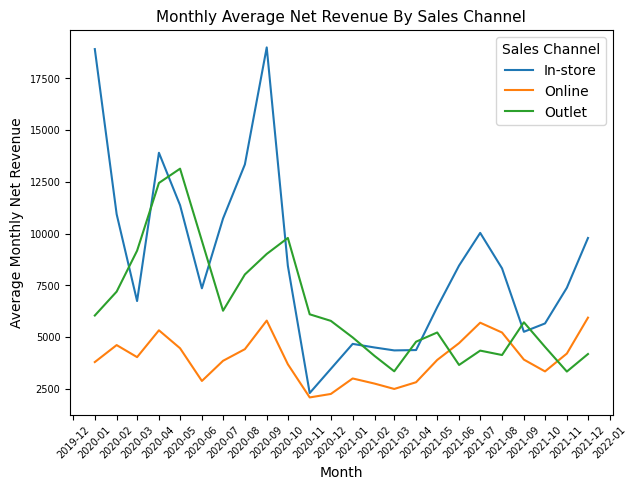

In [81]:
#### Net_Revenue Trend Over Time by Channel
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))

# Create Chart
sns.lineplot(
    data = Monthly_Rev_DF,
    y = 'NET_REVENUE',
    x = 'INVOICE_MONTH',
    errorbar = None,
    hue= 'SALES_METHOD',
    )

# Define Title
plt.title("Monthly Average Net Revenue By Sales Channel", fontsize = 11)
# Set x axis tick size
plt.xticks(fontsize = 7)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set x axis title and size
plt.xlabel('Month',fontsize = 10)
# Set y axis title and size
plt.ylabel('Average Monthly Net Revenue',fontsize = 10)
# Change legend title
plt.legend(title = 'Sales Channel')


# Force all months to appear on the x-axis
ax = plt.gca() ### gca: "Get Current Axis"
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format as YYYY-MM
plt.xticks(rotation=45)  # rotate for readability

plt.show()


###### **Create a Timeseries view of Avergae Units Sold Over Time by Dept:**

In [82]:
### Create a DF of AVG Units Sold at the monthly level
Monthly_Units_DF = Rush_Consolidated_DF_Clean.groupby(['INVOICE_MONTH','PRODUCT_DEPT'])['UNITS_SOLD'].mean().reset_index()

Monthly_Units_DF.sort_values(by = 'UNITS_SOLD', ascending = False).head()

,INVOICE_MONTH,PRODUCT_DEPT,UNITS_SOLD
16,2020-09-01,Men,490.11
17,2020-09-01,Women,471.96
14,2020-08-01,Men,461.24
6,2020-04-01,Men,442.21
15,2020-08-01,Women,435.07


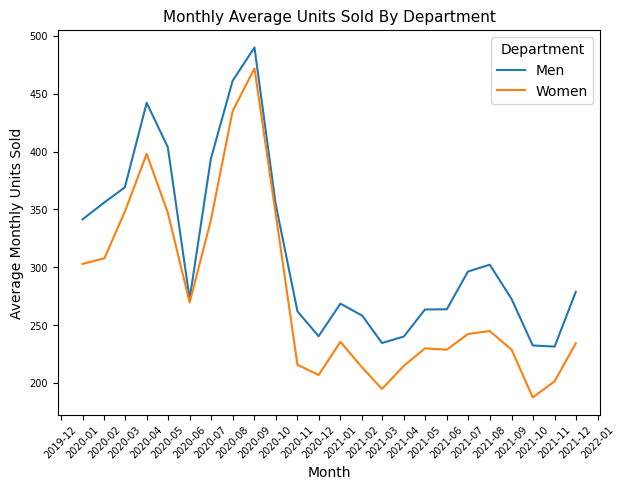

In [83]:
#### Avg Units Sold Trend Over Time by Product Dep
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))

# Create Chart
sns.lineplot(
    data = Monthly_Units_DF,
    y = 'UNITS_SOLD',
    x = 'INVOICE_MONTH',
    errorbar = None,
    hue= 'PRODUCT_DEPT',
    )

# Define Title
plt.title("Monthly Average Units Sold By Department", fontsize = 11)
# Set x axis tick size
plt.xticks(fontsize = 7)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set x axis title and size
plt.xlabel('Month',fontsize = 10)
# Set y axis title and size
plt.ylabel('Average Monthly Units Sold',fontsize = 10)
# Change legend title
plt.legend(title = 'Department')

# Force all months to appear on the x-axis
ax = plt.gca() ### gca: "Get Current Axis"
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format as YYYY-MM
plt.xticks(rotation=45)  # rotate for readability

plt.show()

###### **Average Net Revenue by Month By Dept:**

In [ ]:
### Avg Net Revenue by Department over time
Avg_Net_Rev_Dep = Rush_Consolidated_DF_Clean.groupby(['INVOICE_MONTH','PRODUCT_DEPT'])['NET_REVENUE'].mean().reset_index()

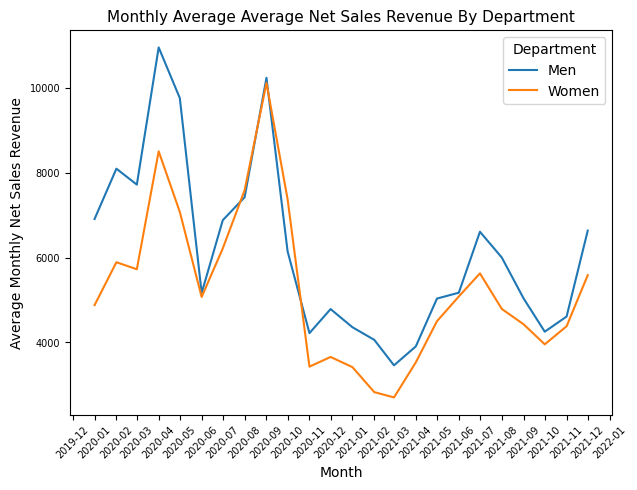

In [126]:
#### Net_Revenue Trend Over Time
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))

# Create Chart
sns.lineplot(
    data = Avg_Net_Rev_Dep,
    y = 'NET_REVENUE',
    x = 'INVOICE_MONTH',
    errorbar = None,
    hue= 'PRODUCT_DEPT',
    )

# Define Title
plt.title("Monthly Average Average Net Sales Revenue By Department", fontsize = 11)
# Set x axis tick size
plt.xticks(fontsize = 7)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set x axis title and size
plt.xlabel('Month',fontsize = 10)
# Set y axis title and size
plt.ylabel('Average Monthly Net Sales Revenue',fontsize = 10)
# Change legend title
plt.legend(title = 'Department')

# Force all months to appear on the x-axis
ax = plt.gca() ### gca: "Get Current Axis"
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format as YYYY-MM
plt.xticks(rotation=45)  # rotate for readability

plt.show()

###### **Sales By Retailer & Sales Channel:**

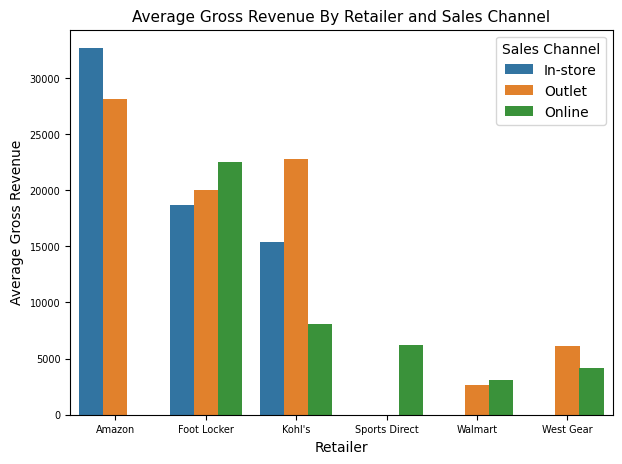

In [84]:
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))
# plt bar plot to show avg tot rev by retailer, split by sales method
sns.barplot(
    data = Rush_Consolidated_DF_Clean,
    y = 'TOTAL_SALES_REVENUE',
    x = 'RETAILER',
    estimator="mean",
    errorbar=None,
    hue = 'SALES_METHOD'
    )

# Define Title
plt.title("Average Gross Revenue By Retailer and Sales Channel", fontsize = 11)
# Set x axis tick size
plt.xticks(fontsize = 7)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set x axis title and size
plt.xlabel('Retailer',fontsize = 10)
# Set y axis title and size
plt.ylabel('Average Gross Revenue',fontsize = 10)
# Change legend title
plt.legend(title = 'Sales Channel')

###### **Show Distribution of Unit Prices:**

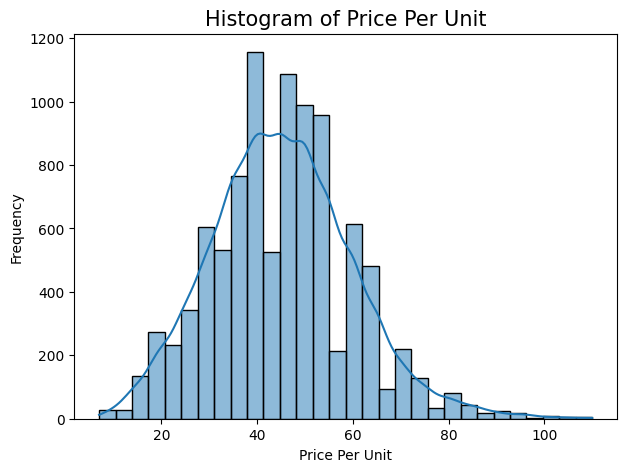

In [85]:
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))
# Distribution of Price Per Unit
sns.histplot(
    data = Rush_Consolidated_DF_Clean['PRICE_PER_UNIT'],
    bins =30,
    kde= True
    ) ### KDE: Kernal Density Estimate Overlay (Smooth line over histogram)

### Set Chart Axis labels and sizes
plt.title('Histogram of Price Per Unit', fontsize = 15)
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.show()

###### **Plot Sales Revenue vs Price Per Unit:**

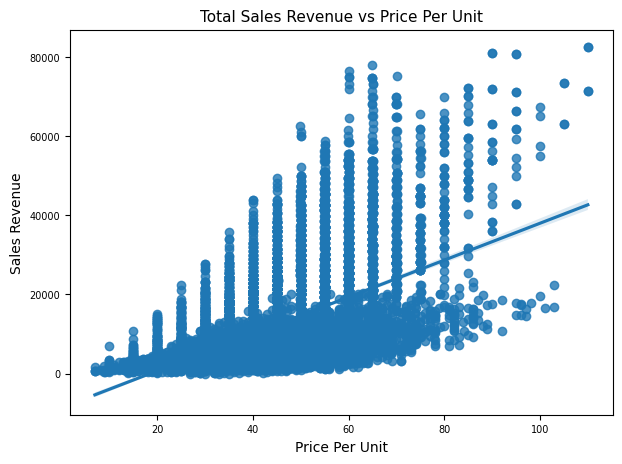

In [86]:
# Set Default Plot size (width by height)
plt.figure(figsize=(7, 5))
sns.regplot(
    data = Rush_Consolidated_DF_Clean,
    y = 'TOTAL_SALES_REVENUE',
    x ='PRICE_PER_UNIT',
    x_jitter = 0.05 ### Makes distro of discrete values more clear
    )

# Define Title
plt.title("Total Sales Revenue vs Price Per Unit", fontsize = 11)
# Set x axis tick size
plt.xticks(fontsize = 7)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set x axis title and size
plt.xlabel('Price Per Unit',fontsize = 10)
# Set y axis title and size
plt.ylabel('Sales Revenue',fontsize = 10)

plt.show()

##### **Statisitical Analysis & Modeling:**

In [87]:
### Utilizing Modeling DF
Rush_Consolidated_DF_Modeling.head(2)

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,RETAILER,STATE,CITY,PRODUCT_NAME,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD_In-store,SALES_METHOD_Online,SALES_METHOD_Outlet,REGION_Midwest,REGION_Northeast,REGION_South,REGION_Southeast,REGION_West,PRODUCT_TYPE_Apparel,PRODUCT_TYPE_Athletic Footwear,PRODUCT_TYPE_Street Footwear,PRODUCT_DEPT_Men,PRODUCT_DEPT_Women
0,1,2020-01-01,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0
1,7,2020-01-07,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0


In [88]:
### View Data Types
Rush_Consolidated_DF_Modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ORDER_ID                        9647 non-null   int64         
 1   INVOICE_DATE                    9647 non-null   datetime64[ns]
 2   INVOICE_MONTH                   9647 non-null   datetime64[ns]
 3   YEAR                            9647 non-null   int64         
 4   RETAILER                        9647 non-null   object        
 5   STATE                           9647 non-null   object        
 6   CITY                            9647 non-null   object        
 7   PRODUCT_NAME                    9647 non-null   object        
 8   PRICE_PER_UNIT                  9647 non-null   float64       
 9   TOTAL_SALES_REVENUE             9647 non-null   float64       
 10  TOTAL_COSTS                     9647 non-null   float64       
 11  NET_

###### **Correlation Using Point Biserial Correlation:**

**Notes:**

Point Biserial Correlation coefficient is useful when one variable is continous <br> while the other is binary. The overall calculation and interpretation of <br> Point Biserial Correlation is generally equivalent to Pearson's <br>Correlation.

* Both Person and Biserial Correlation measure the strenght and direction of the relationships between 2 variables.
* Both equations are similar, but Point Biserial correction takes into account the binary nature of one of the variables
* If one is mistakenly used over the other, you will more than likely get the same relationship strength, but the sign (direction) could be flipped.

**Main Similarities and Differences:**

* Calculation: Both correlations are calculated similarly, but the point biserial correlation adjusts for the binary nature of one variable


* Usage: Use point biserial correlation when one variable is binary and the other is continuous. Use Pearson correlation when both variables are continuous


* Interpretation: The interpretation of the correlation coefficients is similar. A positive value indicates a positive relationship, and a negative value indicates a negative relationship

**Variable Assignment:**

In [89]:
# Continous Vars
Grab_Cont_Vars = [
    'TOTAL_COSTS',
    'TOTAL_SALES_REVENUE',
    'NET_REVENUE',
    'UNITS_SOLD'
    ]

# Binary Vars (Only want to grab Dummy Variables)

# Set up empty list
Grab_Binary_Vars = []

# Iterate through all fileds in df, grab only fields that are integers and are binary, append to list
for fields in Rush_Consolidated_DF_Modeling:
  if is_integer_dtype(Rush_Consolidated_DF_Modeling[fields]):  ### use the is_integer_dtype function from the pandas.api.types to filter to consider only integer dtype fields
    if Rush_Consolidated_DF_Modeling[fields].max() - Rush_Consolidated_DF_Modeling[fields].min() == 1:
      Grab_Binary_Vars.append(fields)


In [90]:
# Check Binary Vars List to see if only needed items were appended:
Grab_Binary_Vars

['YEAR',
 'SALES_METHOD_In-store',
 'SALES_METHOD_Online',
 'SALES_METHOD_Outlet',
 'REGION_Midwest',
 'REGION_Northeast',
 'REGION_South',
 'REGION_Southeast',
 'REGION_West',
 'PRODUCT_TYPE_Apparel',
 'PRODUCT_TYPE_Athletic Footwear',
 'PRODUCT_TYPE_Street Footwear',
 'PRODUCT_DEPT_Men',
 'PRODUCT_DEPT_Women']

In [91]:
# Remove Year from list
Grab_Binary_Vars.remove('YEAR')

# Show final list of Binary Variables
Grab_Binary_Vars

['SALES_METHOD_In-store',
 'SALES_METHOD_Online',
 'SALES_METHOD_Outlet',
 'REGION_Midwest',
 'REGION_Northeast',
 'REGION_South',
 'REGION_Southeast',
 'REGION_West',
 'PRODUCT_TYPE_Apparel',
 'PRODUCT_TYPE_Athletic Footwear',
 'PRODUCT_TYPE_Street Footwear',
 'PRODUCT_DEPT_Men',
 'PRODUCT_DEPT_Women']

In [92]:
# Show Cont Variable List
Grab_Cont_Vars

['TOTAL_COSTS', 'TOTAL_SALES_REVENUE', 'NET_REVENUE', 'UNITS_SOLD']

**Compute Correlation Coefficients & P-Values:**

In [93]:
### Want so see correlations between categorical (dummy variables) and continous variables like Total Sales Rev, Net Rev

# Cross Join both lists
Combined_Vars = list(product(Grab_Binary_Vars,Grab_Cont_Vars))

# Set up blank DFs
coeff_df = pd.DataFrame(index=Grab_Binary_Vars, columns=Grab_Cont_Vars)
p_value_df = pd.DataFrame(index=Grab_Binary_Vars, columns=['TC_PVALUES','TSR_PVALUES','NR_PVALUES','US_PVALUES'])

# Interate through combined list, and compute Correlations Between Vars
for Bin,Cont in Combined_Vars:
  # Calculate Point-Biserial Correlation for each pair in the list
  correlation, p_value = pointbiserialr(Rush_Consolidated_DF_Modeling[Bin],Rush_Consolidated_DF_Modeling[Cont])
  # Store Correlation Results in Coefficient DF
  coeff_df.loc[Bin, Cont] = correlation
  # Store P_Value in p_value
  p_value_df.loc[Bin,Cont] = p_value
  # Print both correlation coefficient and full p_values of each pair
  print(f"The Correlation Coefficient between {Bin} and {Cont} is {correlation}, with a p-value of {p_value}.\n")


# Convert Data Type of coefficients to float (for input into correlation Matrix)
coeff_df = coeff_df.astype(float)
p_value_df = p_value_df.astype(float)


The Correlation Coefficient between SALES_METHOD_In-store and TOTAL_COSTS is 0.31486608802028954, with a p-value of 5.553569464273876e-221.

The Correlation Coefficient between SALES_METHOD_In-store and TOTAL_SALES_REVENUE is 0.2964568291633677, with a p-value of 5.925756255875606e-195.

The Correlation Coefficient between SALES_METHOD_In-store and NET_REVENUE is 0.23479359063105054, with a p-value of 5.949078671008818e-121.

The Correlation Coefficient between SALES_METHOD_In-store and UNITS_SOLD is 0.3056860151635739, with a p-value of 9.116757695587789e-208.

The Correlation Coefficient between SALES_METHOD_Online and TOTAL_COSTS is -0.2868697841952833, with a p-value of 3.880975781594539e-182.

The Correlation Coefficient between SALES_METHOD_Online and TOTAL_SALES_REVENUE is -0.25955271688976017, with a p-value of 2.6532816820331397e-148.

The Correlation Coefficient between SALES_METHOD_Online and NET_REVENUE is -0.18636129986953387, with a p-value of 4.0355358218334275e-76.

The

In [94]:
### Rename Fields in p_value df
p_value_df.rename(
    columns = {
        'TOTAL_COSTS' : 'TC_PVALUES',
        'TOTAL_SALES_REVENUE' : 'TSR_PVALUES',
        'NET_REVENUE' : 'NR_PVALUES',
        'US_PVALUES' : 'US_PVALUES'
        }
    , inplace = True
    )

### Drop NA Fields from P_Values DF
p_value_df.dropna(axis = 1, how = 'all', inplace = True)

In [95]:
### Combine Coeff and p_value dfs
Corr_Combined = pd.concat([coeff_df,p_value_df], axis = 1)

Corr_Combined

,TOTAL_COSTS,TOTAL_SALES_REVENUE,NET_REVENUE,UNITS_SOLD,TC_PVALUES,TSR_PVALUES,NR_PVALUES,UNITS_SOLD
SALES_METHOD_In-store,0.31,0.30,0.23,0.31,0.00,0.00,0.00,0.00
SALES_METHOD_Online,-0.29,-0.26,-0.19,-0.31,0.00,0.00,0.00,0.00
SALES_METHOD_Outlet,0.05,0.03,0.01,0.08,0.00,0.00,0.54,0.00
REGION_Midwest,0.16,0.17,0.16,0.19,0.00,0.00,0.00,0.00
REGION_Northeast,0.18,0.17,0.15,0.20,0.00,0.00,0.00,0.00
REGION_South,-0.24,-0.24,-0.21,-0.27,0.00,0.00,0.00,0.00
REGION_Southeast,-0.03,-0.01,0.01,-0.00,0.01,0.21,0.20,0.73
REGION_West,-0.09,-0.11,-0.12,-0.12,0.00,0.00,0.00,0.00
PRODUCT_TYPE_Apparel,0.00,0.01,0.02,-0.09,0.94,0.53,0.13,0.00
PRODUCT_TYPE_Athletic Footwear,-0.06,-0.09,-0.12,-0.08,0.00,0.00,0.00,0.00


**Plot Correlation Values on Heat Map:**

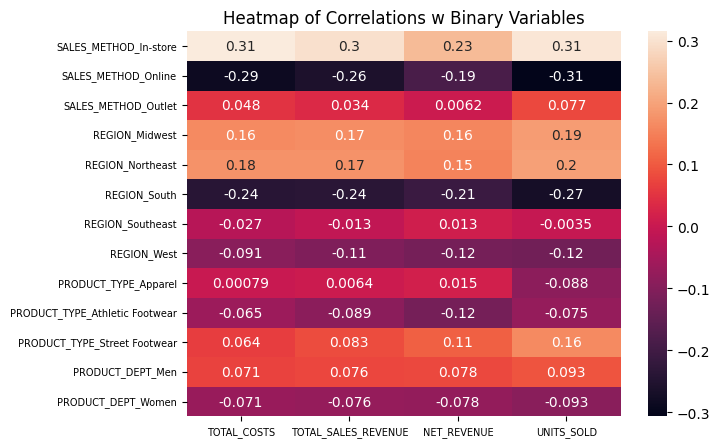

In [96]:
### Continous on Binary:

## Set Figure Size
plt.figure(figsize=(7, 5))
## create heatmap of Correlations
sns.heatmap(coeff_df,annot = True)

# Set x axis tick size
plt.xticks(fontsize = 7, rotation = 360)
# Set y axis tick size
plt.yticks(fontsize = 7)

# Set Chart Title
plt.title("Heatmap of Correlations w Binary Variables")

# Show Chart
plt.show()

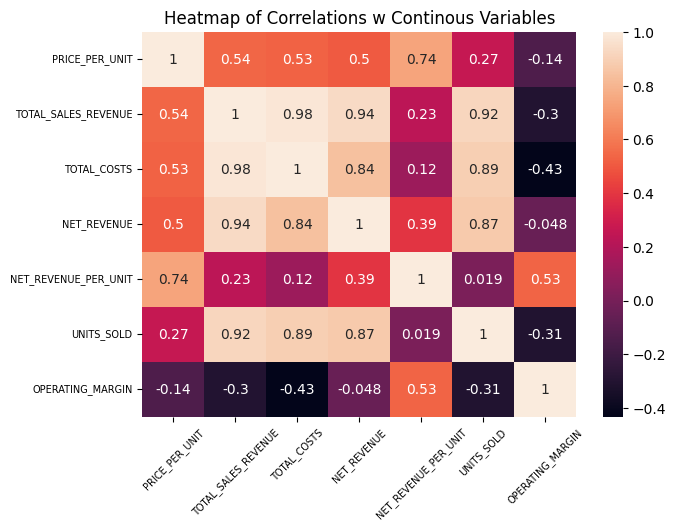

In [97]:
### Cont Variables only:

# Set Variables
Continous_Vars = ['PRICE_PER_UNIT','TOTAL_SALES_REVENUE','TOTAL_COSTS','NET_REVENUE','NET_REVENUE_PER_UNIT','UNITS_SOLD','OPERATING_MARGIN']

# Compute Correlation Coefficients
corr_cont = Rush_Consolidated_DF_Modeling[Continous_Vars].corr()

# Visualize
plt.figure(figsize = (7,5))
# Create Heatmap
sns.heatmap(corr_cont,annot = True)
# Set x axis tick size
plt.xticks(fontsize = 7, rotation = 45)
# Set y axis tick size
plt.yticks(fontsize = 7)
# Set Chart Title
plt.title("Heatmap of Correlations w Continous Variables")

# Show Chart
plt.show()

**Notes:**

Continous/Binary Var combos with highest coefficents (negative or positive direction) are as follows:

**<u>Binary Interaction with TOTAL_COSTS</u>**

* Total_Costs/Sales_Method_in-store: Coeff = 0.31, P_Value = < 0.01 ***
* Total_Costs/Region_Northeast: Coeff = 0.18, P_Value = < 0.01 ***
* Total_Costs/Region_Midwest: Coeff = 0.16, P_Value = < 0.01 ***
* Total_Costs/Sales_Method_online: Coeff = -0.29, P_Value = < 0.01 ***
* Total_Costs/Region_South: Coeff = -0.24, P_Value = < 0.01 ***

**<u>Binary Interaction with TOTAL_SALES_REVENUE</u>**

* Total_Sales_Revenue/Sales_Method_in-store: Coeff = 0.30, P_Value = < 0.01 ***
* Total_Sales_Revenue/Region_Midwest-store: Coeff = 0.17, P_Value = < 0.01 ***
* Total_Sales_Revenue/Region_Northeast-store: Coeff = 0.17, P_Value = < 0.01 ***
* Total_Sales_Revenue/Sales_Method_online: Coeff = -0.26, P_Value = < 0.01 ***

**<u>Binary Interaction with NET_REVENUE</u>**

* Net_Revenue/Sales_Method_in-store: Coeff = 0.23, P_Value = < 0.01 ***
* Net_Revenue/Region_Midwest-store: Coeff = 0.16, P_Value = < 0.01 ***
* Net_Revenue/Region_Northeast-store: Coeff = 0.15, P_Value = < 0.01 ***
* Net_Revenue/PRODUCT_TYPE_Street Footwear: Coeff = 0.11, P_Value = < 0.01 ***
* Net_Revenue/REGION_South: Coeff = -0.21, P_Value = < 0.01 ***
* Net_Revenue/Sales_Method_online: Coeff = -0.19, P_Value = < 0.01 ***
* Net_Revenue/REGION_West: Coeff = -0.12, P_Value = < 0.01 ***
* Net_Revenue/PRODUCT_TYPE_Athletic Footwear: Coeff = -0.12, P_Value = < 0.01 ***

**<u>Binary Interaction with UNITS_SOLD</u>**

* Units_Sold/Sales_Method_in-store: Coeff = 0.31, P_Value = < 0.01 ***
* Units_Sold/Region_Northeast-store: Coeff = 0.20, P_Value = < 0.01 ***
* Units_Sold/Region_Midwest-store: Coeff = 0.19, P_Value = < 0.01 ***
* Units_Sold/PRODUCT_TYPE_Street Footwear: Coeff = 0.16, P_Value = < 0.01 ***
* Units_Sold/REGION_West: Coeff = -0.12, P_Value = < 0.01 ***
* Units_Sold/REGION_South: Coeff = -0.27, P_Value = < 0.01 ***
* Units_Sold/Sales_Method_online: Coeff = -0.31, P_Value = < 0.01 ***

<br>


Continous/Continous Var Combos yielded expected results:

* Operating Margin shows a weak negative relationship with all of the other continous variables, interestingly enough.
* Another Interesting point: Total Costs and Total Sales Revenue shows a near perfect, positive relationship (0.98). I would think they would be opposite personally.

###### **Regression Model:**

Preliminary Notes:

Will regress Net_Revenue vs all variables that we found to be correlated with it to see how:

* Dependent variables react with the target variable (Net_Revenue)
* How much of the variation in the model can be explained by selected dependent variables
* The significance levels of each dependet variable with the target variable

In [98]:
### Using Modeling DF
Rush_Consolidated_DF_Modeling.head()

,ORDER_ID,INVOICE_DATE,INVOICE_MONTH,YEAR,RETAILER,STATE,CITY,PRODUCT_NAME,PRICE_PER_UNIT,TOTAL_SALES_REVENUE,TOTAL_COSTS,NET_REVENUE,NET_REVENUE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD_In-store,SALES_METHOD_Online,SALES_METHOD_Outlet,REGION_Midwest,REGION_Northeast,REGION_South,REGION_Southeast,REGION_West,PRODUCT_TYPE_Apparel,PRODUCT_TYPE_Athletic Footwear,PRODUCT_TYPE_Street Footwear,PRODUCT_DEPT_Men,PRODUCT_DEPT_Women
0,1,2020-01-01,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0
1,7,2020-01-07,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,62500.00,31250.00,31250.00,25.00,1250,0.50,1,0,0,1,0,0,0,0,0,0,1,1,0
2,13,2020-01-25,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,61000.00,30500.00,30500.00,25.00,1220,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0
3,19,2020-01-31,2020-01-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,50.00,60000.00,30000.00,30000.00,25.00,1200,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0
4,25,2020-02-06,2020-02-01,2020,Amazon,Ohio,Columbus,Men's Street Footwear,60.00,73200.00,36600.00,36600.00,30.00,1220,0.50,0,0,1,1,0,0,0,0,0,0,1,1,0


**Variables to use:**

Target Variable(y):

* Net_Revenue

Independent Variables(x):

* Sales_Method
* Region
* Product_Type
* Price Per Unit

In [105]:
### Set independent and dependent variables

# y variable
y = Rush_Consolidated_DF_Modeling['NET_REVENUE']

# x variables (will need to drop one of each binary variable type to avoid dummy variable trap (perfect multi-collinearity))
x = Rush_Consolidated_DF_Modeling[['SALES_METHOD_In-store','SALES_METHOD_Online','REGION_Midwest','REGION_Northeast','REGION_South','PRODUCT_TYPE_Street Footwear','PRICE_PER_UNIT']]

In [106]:
### View y df
y.head()

,NET_REVENUE
0,30000.00
1,31250.00
2,30500.00
3,30000.00
4,36600.00


In [112]:
### View x df
x.head()

,SALES_METHOD_In-store,SALES_METHOD_Online,REGION_Midwest,REGION_Northeast,REGION_South,PRODUCT_TYPE_Street Footwear,PRICE_PER_UNIT
0,1,0,1,0,0,1,50.00
1,1,0,1,0,0,1,50.00
2,0,0,1,0,0,1,50.00
3,0,0,1,0,0,1,50.00
4,0,0,1,0,0,1,60.00


In [108]:
# Select Linear Regression model
linreg = LinearRegression()

# Fit Model
linreg.fit(x,y)

LinearRegression()

In [109]:
### Using Statsmodel package to create a regression summary table
x_with_const = sm.add_constant(x)  ### Add intercpet term to regression summary
sm_model = sm.OLS(y, x_with_const).fit() ### use Statsmodel to create the regression summary

In [110]:
### View Summary of Regression Model
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            NET_REVENUE   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     835.2
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:26:09   Log-Likelihood:                -93304.
No. Observations:                9647   AIC:                         1.866e+05
Df Residuals:                    9639   BIC:                         1.867e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###### **Model Findings:**

  * All explanatory variable coefficients are statistically significant (p_value < 0.01)
  * Online Sales and Sales made in the South have a negative effect on Net Revenue, as seen by their beta coefficients
  * Price Per Unit does have a big effect on Total Revenue
  * R-Squared sits at 0.37, citing that 37% of the change in net revenue in our model can be attributed to the explanatory variables used in the model